# **Overview of the Dataset and Cleaning Steps**


**The Medicines Information Dataset (MID)** is one of the largest publicly available textual datasets on medicines, containing over 192,000 medicine records across 44 therapeutic classes. Each record provides detailed information such as drug names, therapeutic uses, side effects, benefits, dosage instructions, mechanisms of action, safety advice, chemical and therapeutic classes, and more.

This dataset serves as a valuable resource for medical researchers, healthcare professionals, drug manufacturers, and data scientists working on drug information retrieval, classification, prediction, and natural language processing (NLP) applications.

**Challenges in the Raw Data**


While MID is rich in content, the raw data contains several issues that required careful cleaning:


* HTML tags and other text noise embedded within fields.Duplicate records across
* multiple entries.Inconsistent categorical values, such as extra or misplaced characters in class labels.
* String-based NaN values that needed conversion to proper null types.


**Data Cleaning Summary**

To prepare the dataset for analysis and modeling, the following preprocessing steps were performed:


1. Removal of HTML tags and formatting noise using robust parsing and regex cleaning.
2. Elimination of duplicate rows.
3. Standardization of categorical fields by stripping unnecessary words or characters.
4. Conversion of string "nan" and similar placeholders into proper missing values.
5. Targeted corrections for stray characters or substrings within specific columns.


These cleaning operations have transformed the dataset into a consistent, noise-free, and analysis-ready format, suitable for further exploratory analysis, visualization, and machine learning workflows.

## Install Required Libraries

We install **beautifulsoup4** and **lxml** to enable HTML parsing and web scraping capabilities in later steps

In [ ]:
!pip install beautifulsoup4 lxml

In [1]:
import numpy as np 
import pandas as pd 
import os

import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import html, re, pathlib

## 🗂️ Load Dataset

In [2]:
data= pd.read_excel('/kaggle/input/medical-information-dataset/MID.xlsx')
data.head(5)

,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
0,Andol 0.5mg Tablet,https://www.1mg.com/drugs/andol-0.5mg-tablet-6...,Haloperidol (0.5mg),Andol 0.5mg Tablet can also be used for treati...,"\n \n \nul \""\""\n\n \n 0\n\n \n Schiz...",\n \n Schizophrenia \n \n Schizophrenia is ...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Andol 0.5mg Tablet is a typical antipsychotic....,\n \n Andol 0.5mg Tablet helps treat schizop...,"\nAlcohol\n,\nAndol 0.5mg Tablet may cause exc...",Butyrophenone Derivative,No,NEURO CNS,Typical Antipsychotic
1,Avastin 100mg Injection,https://www.1mg.com/drugs/avastin-100mg-inject...,Bevacizumab (100mg),"\np dir=\""ltr\"" style=\""line-height: 1.38; mar...","\n \n \nul \""\""\n\n \n 0\n\n \n Cance...",\n \n Cancer of colon and rectum \n \n Canc...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Avastin 100mg Injection is a anti-angiogenic m...,\n \n Avastin 100mg Injection is an effectiv...,"\nAlcohol\n,\nIt is not known whether it is sa...",Monoclonal antibody (mAb),No,ANTI NEOPLASTICS,Vascular endothelial growth factor (VEGF) in...
2,Actorise 40 Injection,https://www.1mg.com/drugs/actorise-40-injectio...,Darbepoetin alfa (40mcg),Actorise 40 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 40 Injection is an erythropoiesis-sti...,\n \n Actorise 40 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
3,Actorise 25 Injection,https://www.1mg.com/drugs/actorise-25-injectio...,Darbepoetin alfa (25mcg),Actorise 25 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 25 Injection is an erythropoiesis-sti...,\n \n Actorise 25 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
4,Actorise 60 Injection,https://www.1mg.com/drugs/actorise-60-injectio...,Darbepoetin alfa (60mcg),Actorise 60 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 60 Injection is an erythropoiesis-sti...,\n \n Actorise 60 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA


In [3]:
print(f"Dataset shape: {data.shape[0]} rows, {data.shape[1]} columns\n")

Dataset shape: 192807 rows, 15 columns



In [4]:
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192807 entries, 0 to 192806
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Name                 192807 non-null  object
 1   Link                 192807 non-null  object
 2   Contains             192807 non-null  object
 3   ProductIntroduction  180821 non-null  object
 4   ProductUses          192807 non-null  object
 5   ProductBenefits      192807 non-null  object
 6   SideEffect           192807 non-null  object
 7   HowToUse             192712 non-null  object
 8   HowWorks             192571 non-null  object
 9   QuickTips            192807 non-null  object
 10  SafetyAdvice         192807 non-null  object
 11  Chemical_Class       101473 non-null  object
 12  Habit_Forming        192807 non-null  object
 13  Therapeutic_Class    192807 non-null  object
 14  Action_Class         85690 non-null   object
dtypes: object(15)
memory usage: 22.1+ 

In [5]:
# Display summary statistics
data.describe()

,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
count,192807,192807,192807,180821,192807,192807,192807,192712,192571,192807,192807,101473,192807,192807,85690
unique,147872,151007,11940,136893,1147,144479,121482,120713,145994,137470,147857,869,4,44,405
top,NS 0.9% Infusion,https://www.1mg.com/drugs/oltrypsin-forte-1000...,Pantoprazole (40mg),Give this medicine to your child an hour befor...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...","efits"":null",""":null",Your doctor or nurse will give you this medici...,Montelukast is a leukotriene antagonist. It wo...,:null,\n,Fluoroquinolone,No,ANTI INFECTIVES,Cephalosporins 3 generatio
freq,12,5,2205,506,19283,2994,3558,17018,676,1463,229,4805,188428,20291,5888


## 📊 Visualize distributions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


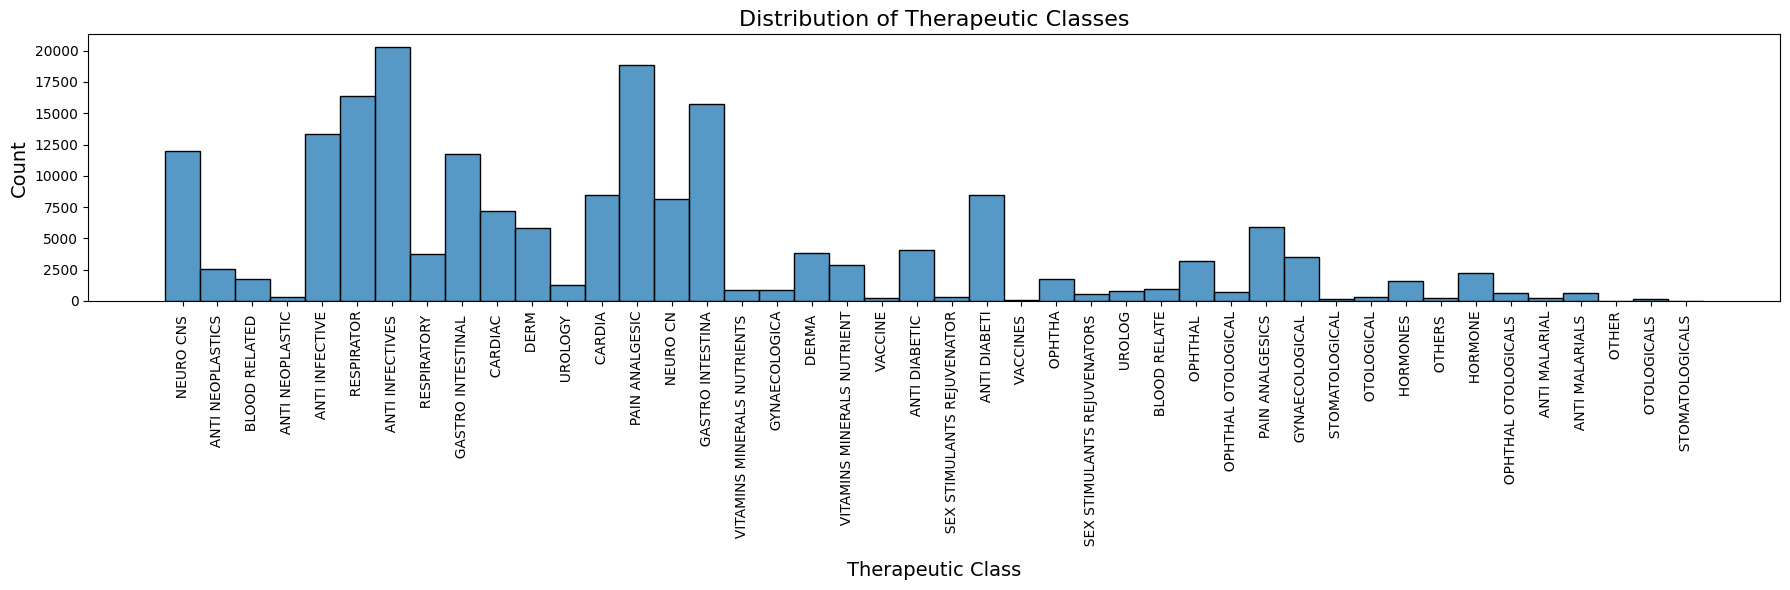

In [6]:
plt.figure(figsize=(18, 6))
sns.histplot(data['Therapeutic_Class'], kde=False) 

plt.xticks(rotation=90)  
plt.xlabel("Therapeutic Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Therapeutic Classes", fontsize=16)

plt.tight_layout() 
plt.show()

 ## 🧹 Clean HTML/Styling Noise from Text Columns

In [7]:
data_clean = data.copy()

First we use **“smart lowercase”** instead of a simple .lower()


In biomedical and pharmaceutical text, many tokens such as drug names, gene/protein symbols (e.g., HER2, CYP3A4), and standardized codes (e.g., ATC codes) are case-sensitive. Converting everything to lowercase would lose this information and harm downstream tasks like Named Entity Recognition or ontology mapping.

To avoid that, we apply a custom lowercase function that:


* Keeps predefined biomedical abbreviations and code patterns unchanged.
* Lowercases only the rest of the text.
* Safely handles non-string and missing values.


This approach preserves the meaning of domain-specific terms while still normalizing the general text for NLP processing.

In [8]:
BIOMED_ABBREVIATIONS = {
    "DNA","RNA","mRNA","tRNA","ATP","ADP","AMP","NAD","NADH",
    "HER2","EGFR","VEGF","TNF","IL","ACE","ARB","HIV","AIDS",
    "SARS","MERS","COVID","ECG","EEG","MRI","CT","NSAID","HDL","LDL",
    "IgG","IgM","IgA","HLA","GABA","CNS","CVD","COPD"
}


BIOMED_PATTERNS = [
    r"\bCYP\d+[A-Z]?\d*\b",     # CYP3A4, CYP2D6
    r"\bIL-?\d+\b",             # IL-6, IL10
    r"\bTNF-?[A-Z]?\b",         # TNF, TNF-a
    r"\bHER\d+\b",              # HER2
    r"\bERK\d+\b",              # ERK1
    r"\bJAK\d+\b",              # JAK2
    r"\bNF-?κ?B\b",             # NF-κB / NF-kB
    r"\b(?=.{2,6}\b)[A-Z]{2,6}\d*\b",  
]


GREEK_MAP = {
    "alpha": "α", "beta": "β", "gamma": "γ", "kappa": "κ"
}


_token_re = re.compile(r"(\w+|\s+|[^\w\s])", re.UNICODE)

def _should_preserve(token):
  
    if token in BIOMED_ABBREVIATIONS:
        return True
   
    for pat in BIOMED_PATTERNS:
        if re.fullmatch(pat, token):
            return True
    return False

def smart_lowercase_text(text):
    
    if pd.isna(text):
        return text
        
    text = str(text)
    
    parts = _token_re.findall(text)
    out = []
    for tok in parts:
    
        if tok.strip() and tok.isalnum():
            if _should_preserve(tok):
                out.append(tok)            
            else:
                out.append(tok.lower()) 
        else:
            out.append(tok)               
    return "".join(out)

In [9]:
keep_columns = [col for col in data_clean.columns 
             if col not in ['Name', 'Link', 'SideEffect', 'Therapeutic_Class']]

for col in keep_columns:
     data_clean[col] = data_clean[col].apply(smart_lowercase_text)

In [11]:
from bs4 import MarkupResemblesLocatorWarning
import warnings

warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)

ATTR_NAMES = r"(?:dir|style|class|id|lang|align|valign|width|height|color|face|size|border)"

ATTR_PAIR   = re.compile(rf"\b{ATTR_NAMES}\s*=\s*(?:\"[^\"]*\"|'[^']*'|[^\s\"'>]+)\b", re.I)

EMPTY_ATTR  = re.compile(rf"\b{ATTR_NAMES}\s*=\s*(?:\"[ \t]*\"|'[ \t]*')\b", re.I)

CSS_PAIR    = re.compile(r"\b[a-z-]+\s*:\s*[^;]+;?")
HEX_COLOR   = re.compile(r"#(?:[0-9a-fA-F]{3}|[0-9a-fA-F]{6})\b")

SLASH_TAG   = re.compile(r"(?<!<)/\s*(?:[a-z][a-z0-9]*)\b", re.I)
BARE_TAGS   = re.compile(r"\b(?:p|span|strong|em|b|i|u|br|div|ul|li|ol|h[1-6])\b", re.I)

BULLETS     = re.compile(r"(?m)^\s*(?:[\-\*\u2022]|\d{1,3}[.)])\s+")

LIT_ESC     = re.compile(r"\\[nrt]")

URL_LIKE    = re.compile(r"^https?://\S+$", re.I)

MULTISPACE  = re.compile(r"\s+")

EMPTY_TOKENS = {"", "na", "<na>", "n/a", "none", "null", "-", "—", "–"}

def clean_html_robust(text, *, to_lower=False, return_empty_as_na=True, max_passes=3):
    if pd.isna(text):
        return pd.NA

    raw = str(text)

    # 1) HTML entities
    raw = html.unescape(raw)

    # 2) unsupported escapes → escape
    raw = re.sub(r'\\(?![abfnrtv"\'\\0-7xXuU])', r'\\\\', raw)

    # 3) decode legitimate escapes
    raw = raw.encode("utf-8").decode("unicode_escape", errors="ignore")

    if not URL_LIKE.match(raw):
        plain = BeautifulSoup(raw, "html.parser").get_text(" ", strip=True)
    else:
        plain = raw


    for _ in range(max_passes):
        old = plain
    
        plain = ATTR_PAIR.sub(" ", plain)
        plain = CSS_PAIR.sub(" ", plain)
        plain = HEX_COLOR.sub(" ", plain)
        plain = EMPTY_ATTR.sub(" ", plain)

        
        plain = SLASH_TAG.sub(" ", plain)
        plain = BARE_TAGS.sub(" ", plain)

        plain = BULLETS.sub("", plain)

        plain = LIT_ESC.sub(" ", plain)
        plain = plain.replace("\n", " ").replace("\r", " ").replace("\t", " ")

        plain = MULTISPACE.sub(" ", plain).strip()

        if plain == old:
            break

    if return_empty_as_na and plain.lower() in EMPTY_TOKENS:
        return pd.NA

    return plain

data_cols = [col for col in data_clean.columns 
             if col not in ['Name', 'Link', 'Therapeutic_Class']]

for col in data_cols:
    data_clean[col] = data_clean[col].apply(clean_html_robust)

data_clean.head(5)

,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
0,Andol 0.5mg Tablet,https://www.1mg.com/drugs/andol-0.5mg-tablet-6...,haloperidol (0.5mg),andol 0.5mg tablet can also be used for treati...,""""" 0 schizophrenia",schizophrenia schizophrenia is a mental disord...,Most side effects do not require any medical a...,take this medicine in the dose and duration as...,andol 0.5mg tablet is a typical antipsychotic....,andol 0.5mg tablet helps treat schizophrenia. ...,"alcohol , andol 0.5mg tablet may cause excessi...",butyrophenone derivative,no,NEURO CNS,typical antipsychotic
1,Avastin 100mg Injection,https://www.1mg.com/drugs/avastin-100mg-inject...,bevacizumab (100mg),"dir=""ltr"" style="" "" style="" "" avastin 100mg in...",""""" 0 cancer of colon and rectum 1 non-small ce...",cancer of colon and rectum cancer of the colon...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,avastin 100mg injection is a anti-angiogenic m...,"avastin 100mg injection is an effective, first...","alcohol , it is not known whether it is safe t...",monoclonal antibody (mab),no,ANTI NEOPLASTICS,vascular endothelial growth factor (VEGF) inhi...
2,Actorise 40 Injection,https://www.1mg.com/drugs/actorise-40-injectio...,darbepoetin alfa (40mcg),actorise 40 injection is a medicine that needs...,""""" 0 treatment of anemia due to chronic kidney...",treatment of anemia due to chronic kidney dise...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,actorise 40 injection is an erythropoiesis-sti...,actorise 40 injection helps in the treatment o...,"alcohol , it is not known whether it is safe t...","amino acids, peptides analogues",no,BLOOD RELATED,erythropoiesis-stimulating agent (ESA
3,Actorise 25 Injection,https://www.1mg.com/drugs/actorise-25-injectio...,darbepoetin alfa (25mcg),actorise 25 injection is a medicine that needs...,""""" 0 treatment of anemia due to chronic kidney...",treatment of anemia due to chronic kidney dise...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,actorise 25 injection is an erythropoiesis-sti...,actorise 25 injection helps in the treatment o...,"alcohol , it is not known whether it is safe t...","amino acids, peptides analogues",no,BLOOD RELATED,erythropoiesis-stimulating agent (ESA
4,Actorise 60 Injection,https://www.1mg.com/drugs/actorise-60-injectio...,darbepoetin alfa (60mcg),actorise 60 injection is a medicine that needs...,""""" 0 treatment of anemia due to chronic kidney...",treatment of anemia due to chronic kidney dise...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,actorise 60 injection is an erythropoiesis-sti...,actorise 60 injection helps in the treatment o...,"alcohol , it is not known whether it is safe t...","amino acids, peptides analogues",no,BLOOD RELATED,erythropoiesis-stimulating agent (ESA


### ***Remove Other Noises :)***

In [12]:
data_clean['ProductUses'] = (
    data_clean['ProductUses']
        .str.replace(r'^\s*"+\s*', '', regex=True)
        .str.replace(r'\s*"+\s*$', '', regex=True)
        .str.strip()
)

In [13]:
data_clean["Habit_Forming"] = data_clean["Habit_Forming"].str.replace("~", "", regex=False)
data_clean["ProductBenefits"] = data_clean["ProductBenefits"].str.replace('efits":null', '', regex=False)
data_clean["QuickTips"] = data_clean["QuickTips"].str.replace(":null", "", regex=False)
data_clean["ProductUses"] = data_clean["ProductUses"].str.replace(r"^0\s*", "", regex=True)

In [14]:
data_clean["ProductBenefits"][207:214]

207                                                     
208    medical abortion a kare combipack is used to c...
209    treatment of cough with mucus alkof syrup help...
210    prevention of rabies rabies is a serious disea...
211    treatment of bacterial infections azikem 500mg...
212    prevention of angina (heart-related chest pain...
213    dry cough a dry cough is a cough where no phle...
Name: ProductBenefits, dtype: object

## 🏷️***Normalization of categorical values in Therapeutic_Class***

In [15]:
data['Therapeutic_Class'].unique()

array(['  NEURO CNS ', '  ANTI NEOPLASTICS ', '  BLOOD RELATED ',
       '  ANTI NEOPLASTIC', '  ANTI INFECTIVE', '  RESPIRATOR',
       '  ANTI INFECTIVES ', '  RESPIRATORY ', '  GASTRO INTESTINAL ',
       '  CARDIAC ', '  DERM', '  UROLOGY ', '  CARDIA',
       '  PAIN ANALGESIC', '  NEURO CN', '  GASTRO INTESTINA',
       '  VITAMINS MINERALS NUTRIENTS ', '  GYNAECOLOGICA', '  DERMA ',
       '  VITAMINS MINERALS NUTRIENT', '  VACCINE', '  ANTI DIABETIC ',
       '  SEX STIMULANTS REJUVENATOR', '  ANTI DIABETI', '  VACCINES ',
       '  OPHTHA', '  SEX STIMULANTS REJUVENATORS ', '  UROLOG',
       '  BLOOD RELATE', '  OPHTHAL ', '  OPHTHAL OTOLOGICAL',
       '  PAIN ANALGESICS ', '  GYNAECOLOGICAL ', '  STOMATOLOGICAL',
       '  OTOLOGICAL', '  HORMONES ', '  OTHERS ', '  HORMONE',
       '  OPHTHAL OTOLOGICALS ', '  ANTI MALARIAL', '  ANTI MALARIALS ',
       '  OTHER', '  OTOLOGICALS ', '  STOMATOLOGICALS '], dtype=object)

In [16]:
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*ANTI NEOPLASTIC\s*$', 'ANTI NEOPLASTICS', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*ANTI INFECTIVE\s*$', 'ANTI INFECTIVES', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*RESPIRATOR\s*$', 'RESPIRATORY', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*GASTRO INTESTINA\s*$', 'GASTRO INTESTINAL', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*CARDIA\s*$', 'CARDIAC', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*DERM\s*$', 'DERMA', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*BLOOD RELATE\s*$', 'BLOOD RELATED', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*NEURO CN\s*$', 'NEURO CNS', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*UROLOG\s*$', 'UROLOGY', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*PAIN ANALGESIC\s*$', 'PAIN ANALGESICS', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*VITAMINS MINERALS NUTRIENT\s*$', 'VITAMINS MINERALS NUTRIENTS', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*GYNAECOLOGICA\s*$', 'GYNAECOLOGICAL', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*VACCINE\s*$', 'VACCINES', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*ANTI DIABETI\s*$', 'ANTI DIABETIC', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*SEX STIMULANTS REJUVENATOR\s*$', 'SEX STIMULANTS REJUVENATORS', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*OPHTHA\s*$', 'OPHTHAL', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*OPHTHAL OTOLOGICAL\s*$', 'OPHTHAL OTOLOGICALS', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*STOMATOLOGICAL\s*$', 'STOMATOLOGICALS', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*OTOLOGICAL\s*$', 'OTOLOGICALS', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*HORMONE\s*$', 'HORMONES', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*ANTI MALARIAL\s*$', 'ANTI MALARIALS', regex=True)
data_clean['Therapeutic_Class'] = data_clean['Therapeutic_Class'] .replace(r'^\s*OTHER\s*$', 'OTHERS', regex=True)


data_clean['Therapeutic_Class']  = data_clean['Therapeutic_Class'] .str.strip()

In [17]:
data_clean['Therapeutic_Class'].unique()

array(['NEURO CNS', 'ANTI NEOPLASTICS', 'BLOOD RELATED',
       'ANTI INFECTIVES', 'RESPIRATORY', 'GASTRO INTESTINAL', 'CARDIAC',
       'DERMA', 'UROLOGY', 'PAIN ANALGESICS',
       'VITAMINS MINERALS NUTRIENTS', 'GYNAECOLOGICAL', 'VACCINES',
       'ANTI DIABETIC', 'SEX STIMULANTS REJUVENATORS', 'OPHTHAL',
       'OPHTHAL OTOLOGICALS', 'STOMATOLOGICALS', 'OTOLOGICALS',
       'HORMONES', 'OTHERS', 'ANTI MALARIALS'], dtype=object)

## Remove Duplicates

In [18]:
duplicates = data_clean[data_clean.duplicated(keep=False)]
duplicates

,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
0,Andol 0.5mg Tablet,https://www.1mg.com/drugs/andol-0.5mg-tablet-6...,haloperidol (0.5mg),andol 0.5mg tablet can also be used for treati...,schizophrenia,schizophrenia schizophrenia is a mental disord...,Most side effects do not require any medical a...,take this medicine in the dose and duration as...,andol 0.5mg tablet is a typical antipsychotic....,andol 0.5mg tablet helps treat schizophrenia. ...,"alcohol , andol 0.5mg tablet may cause excessi...",butyrophenone derivative,no,NEURO CNS,typical antipsychotic
1,Avastin 100mg Injection,https://www.1mg.com/drugs/avastin-100mg-inject...,bevacizumab (100mg),"dir=""ltr"" style="" "" style="" "" avastin 100mg in...",cancer of colon and rectum 1 non-small cell lu...,cancer of colon and rectum cancer of the colon...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,avastin 100mg injection is a anti-angiogenic m...,"avastin 100mg injection is an effective, first...","alcohol , it is not known whether it is safe t...",monoclonal antibody (mab),no,ANTI NEOPLASTICS,vascular endothelial growth factor (VEGF) inhi...
2,Actorise 40 Injection,https://www.1mg.com/drugs/actorise-40-injectio...,darbepoetin alfa (40mcg),actorise 40 injection is a medicine that needs...,treatment of anemia due to chronic kidney dise...,treatment of anemia due to chronic kidney dise...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,actorise 40 injection is an erythropoiesis-sti...,actorise 40 injection helps in the treatment o...,"alcohol , it is not known whether it is safe t...","amino acids, peptides analogues",no,BLOOD RELATED,erythropoiesis-stimulating agent (ESA
3,Actorise 25 Injection,https://www.1mg.com/drugs/actorise-25-injectio...,darbepoetin alfa (25mcg),actorise 25 injection is a medicine that needs...,treatment of anemia due to chronic kidney dise...,treatment of anemia due to chronic kidney dise...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,actorise 25 injection is an erythropoiesis-sti...,actorise 25 injection helps in the treatment o...,"alcohol , it is not known whether it is safe t...","amino acids, peptides analogues",no,BLOOD RELATED,erythropoiesis-stimulating agent (ESA
4,Actorise 60 Injection,https://www.1mg.com/drugs/actorise-60-injectio...,darbepoetin alfa (60mcg),actorise 60 injection is a medicine that needs...,treatment of anemia due to chronic kidney dise...,treatment of anemia due to chronic kidney dise...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,actorise 60 injection is an erythropoiesis-sti...,actorise 60 injection helps in the treatment o...,"alcohol , it is not known whether it is safe t...","amino acids, peptides analogues",no,BLOOD RELATED,erythropoiesis-stimulating agent (ESA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192690,Zensita 50mg Tablet,https://www.1mg.com/drugs/zensita-50mg-tablet-...,sitagliptin (50mg),zensita 50mg tablet is normally prescribed whe...,treatment of type 2 diabetes mellitus,treatment of type 2 diabetes mellitus zensita ...,Most side effects do not require any medical a...,take this medicine in the dose and duration as...,zensita 50mg tablet is an antidiabetic medicat...,zensita 50mg tablet should be taken at the sam...,"alcohol , it is unsafe to consume alcohol with...",pyrazine-derivative,no,ANTI DIABETIC,DPP-4 inhibitor
192691,Zyfor 300mg Tablet ER,https://www.1mg.com/drugs/zyfor-300mg-tablet-e...,faropenem (300mg),zyfor 300mg tablet ER is the only medicine of ...,treatment of severe bacterial infections,treatment of severe bacterial infections zyfor...,Most side effects do not require any medical a...,take this medicine in the dose and dur

Now, check duplicates 🤔

In [19]:
first_row = data_clean.iloc[1]

matching_first_row = data_clean[data_clean.eq(first_row).all(axis=1)]

matching_first_row

,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
1,Avastin 100mg Injection,https://www.1mg.com/drugs/avastin-100mg-inject...,bevacizumab (100mg),"dir=""ltr"" style="" "" style="" "" avastin 100mg in...",cancer of colon and rectum 1 non-small cell lu...,cancer of colon and rectum cancer of the colon...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,avastin 100mg injection is a anti-angiogenic m...,"avastin 100mg injection is an effective, first...","alcohol , it is not known whether it is safe t...",monoclonal antibody (mab),no,ANTI NEOPLASTICS,vascular endothelial growth factor (VEGF) inhi...
31,Avastin 100mg Injection,https://www.1mg.com/drugs/avastin-100mg-inject...,bevacizumab (100mg),"dir=""ltr"" style="" "" style="" "" avastin 100mg in...",cancer of colon and rectum 1 non-small cell lu...,cancer of colon and rectum cancer of the colon...,Most side effects do not require any medical a...,your doctor or nurse will give you this medici...,avastin 100mg injection is a anti-angiogenic m...,"avastin 100mg injection is an effective, first...","alcohol , it is not known whether it is safe t...",monoclonal antibody (mab),no,ANTI NEOPLASTICS,vascular endothelial growth factor (VEGF) inhi...


In [20]:
data_clean = data_clean.drop_duplicates()

**---------------------------- New Data Is Ready :) -------------------------------------**

In [21]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151016 entries, 0 to 192806
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Name                 151016 non-null  object
 1   Link                 151016 non-null  object
 2   Contains             151016 non-null  object
 3   ProductIntroduction  141298 non-null  object
 4   ProductUses          150948 non-null  object
 5   ProductBenefits      151016 non-null  object
 6   SideEffect           151016 non-null  object
 7   HowToUse             150940 non-null  object
 8   HowWorks             150831 non-null  object
 9   QuickTips            151016 non-null  object
 10  SafetyAdvice         150834 non-null  object
 11  Chemical_Class       79548 non-null   object
 12  Habit_Forming        151016 non-null  object
 13  Therapeutic_Class    151016 non-null  object
 14  Action_Class         67138 non-null   object
dtypes: object(15)
memory usage: 18.4+ MB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


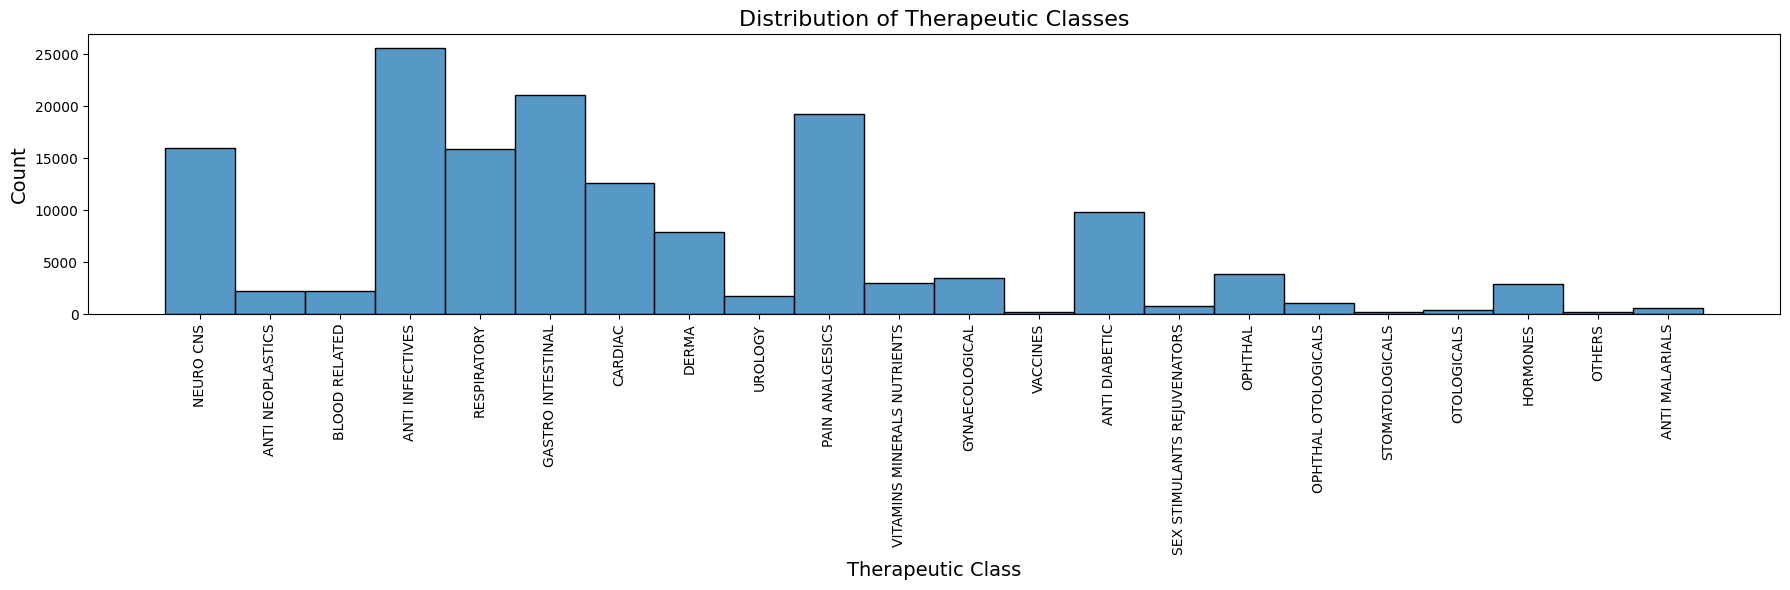

In [22]:
plt.figure(figsize=(18, 6))
sns.histplot(data_clean['Therapeutic_Class'], kde=False) 

plt.xticks(rotation=90)  
plt.xlabel("Therapeutic Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Therapeutic Classes", fontsize=16)

plt.tight_layout() 
plt.show()

## ✔ Save Clean Dataset

In [23]:
clean_data = data_clean
clean_data.to_excel('MedInfo_cleaned.xlsx', index=False)